# About Dataset

Telah terjadi penurunan pendapatan di Bank Portugis dan mereka ingin mengetahui tindakan apa yang harus diambil. Setelah diselidiki, mereka menemukan bahwa akar permasalahannya adalah nasabah mereka tidak cukup berinvestasi pada deposito jangka panjang. Oleh karena itu, bank ingin mengidentifikasi nasabah lama yang memiliki peluang lebih tinggi untuk berlangganan deposito jangka panjang dan memfokuskan upaya pemasaran pada nasabah tersebut.

## Informasi Kumpulan Data

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, diperlukan lebih dari satu kontak ke klien yang sama, untuk mengakses apakah produk (deposito berjangka bank) akan berlangganan ('ya') atau tidak ('tidak') berlangganan.

Target : - Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y).

Fitur :
* Age = Usia
* Job = jenis pekerjaan ('admin.','kerah biru','wirausahawan','pembantu rumah tangga','manajemen','pensiun','wiraswasta','jasa','mahasiswa','teknisi',' pengangguran','tidak diketahui')
* Martial = status perkawinan ('bercerai', 'menikah', 'lajang', 'tidak diketahui'; catatan: 'bercerai' berarti bercerai atau janda)
* Credit = ('dasar.4 tahun', 'dasar.6 tahun', 'dasar.9 tahun', 'sekolah menengah atas', 'buta huruf', 'kursus profesional', 'gelar universitas', 'tidak diketahui')
* Default  apakah kreditnya gagal bayar? ('tidak','ya','tidak diketahui')
* Housing = memiliki pinjaman perumahan? ('tidak','ya','tidak diketahui')
* Loan = memiliki pinjaman pribadi? ('tidak','ya','tidak diketahui')
* Contact = jenis kontak komunikasi  ('seluler','telepon')
* Mounth = bulan kontak terakhir dalam setahun ('jan', 'feb', 'mar', …, 'nov', 'dec')
* Day of week = hari kontak terakhir dalam seminggu ('sen','sel','rabu','kamis','jum')
* Duration = durasi kontak terakhir, dalam hitungan detik. Catatan penting: atribut ini sangat mempengaruhi target keluaran (misal, jika durasi=0 maka y='tidak')
* Campaign = jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (termasuk kontak terakhir)
* pdays = jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (999 berarti klien belum pernah dihubungi sebelumnya)
* Previous = jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini
* Poutcome = hasil kampanye pemasaran sebelumnya ('kegagalan', 'tidak ada', 'sukses')
* y = apakah klien sudah berlangganan deposito berjangka? ('ya Tidak')

# Importing The Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Import libraries untuk classification project
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Import for evaluation Classification Project
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#Membuka tabel Dataframe
data = pd.read_csv('bank_train set.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


# Exploratory Data Analyis

## Data Understanding

In [3]:
#Mengenali lebih dalam informasi pada table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
data.shape

(32950, 16)

In [6]:
#melihat informasi statistik dataframe 
data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [7]:
for column in data.columns:
    print (f"=========={column}==========")
    display(data[column].value_counts())
    print()

==========age==========


age
31    1551
32    1474
33    1443
35    1417
34    1404
      ... 
17       3
89       2
87       1
91       1
98       1
Name: count, Length: 75, dtype: int64


==========job==========


job
admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: count, dtype: int64


==========marital==========


marital
married     19953
single       9257
divorced     3675
unknown        65
Name: count, dtype: int64


==========education==========


education
university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: count, dtype: int64


==========default==========


default
no         26007
unknown     6940
yes            3
Name: count, dtype: int64


==========housing==========


housing
yes        17254
no         14900
unknown      796
Name: count, dtype: int64


==========loan==========


loan
no         27131
yes         5023
unknown      796
Name: count, dtype: int64


==========contact==========


contact
cellular     20908
telephone    12042
Name: count, dtype: int64


==========month==========


month
may    11011
jul     5763
aug     4948
jun     4247
nov     3266
apr     2085
oct      587
sep      464
mar      436
dec      143
Name: count, dtype: int64


==========day_of_week==========


day_of_week
thu    6857
mon    6812
wed    6515
tue    6444
fri    6322
Name: count, dtype: int64


==========duration==========


duration
90      147
124     139
136     138
85      137
97      133
       ... 
1285      1
2203      1
1848      1
1248      1
1434      1
Name: count, Length: 1467, dtype: int64


==========campaign==========


campaign
1     14121
2      8469
3      4300
4      2116
5      1255
6       773
7       493
8       329
9       220
10      187
11      142
12       92
13       74
14       52
17       51
15       45
16       42
18       27
20       22
21       20
19       16
22       13
24       12
23       12
27        9
25        8
26        7
31        7
29        7
28        6
30        6
35        4
33        3
43        2
32        2
42        2
34        1
37        1
40        1
56        1
Name: count, dtype: int64


==========pdays==========


pdays
999    31724
3        355
6        337
4         97
2         52
7         47
9         45
10        43
12        40
5         40
13        28
1         22
11        21
15        21
14        18
8         14
0         12
16         9
17         8
18         6
22         3
19         2
21         2
27         1
25         1
20         1
26         1
Name: count, dtype: int64


==========previous==========


previous
0    28416
1     3673
2      606
3      175
4       60
5       14
6        5
7        1
Name: count, dtype: int64


==========poutcome==========


poutcome
nonexistent    28416
failure         3429
success         1105
Name: count, dtype: int64


==========y==========


y
no     29238
yes     3712
Name: count, dtype: int64

#### Checking Nan Value

In [8]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data.head (10)

,total,percent
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
day_of_week,0,0.0


> Setelah di evaluasi, tidak terdapat variabel NaN.

#### Get Numeric Data

In [9]:
num_data = data._get_numeric_data().columns
data_numeric = data[num_data]
data_numeric.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


> Pada Dataframe terdapat 5 kolom yang merupakan data Numerik

#### Get Categorical Data

In [10]:
data_categorical = data.drop(num_data, axis=1)
data_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,nonexistent,no
1,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,failure,no
2,retired,married,basic.4y,no,no,no,cellular,jul,mon,nonexistent,yes
3,admin.,married,university.degree,no,yes,no,telephone,may,mon,nonexistent,no
4,retired,divorced,university.degree,no,no,no,cellular,jun,tue,nonexistent,no


> Pada Dataframe terdapat 11 kolom yang merupakan data Caregorical

#### Data Visualization to Get an Insight

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

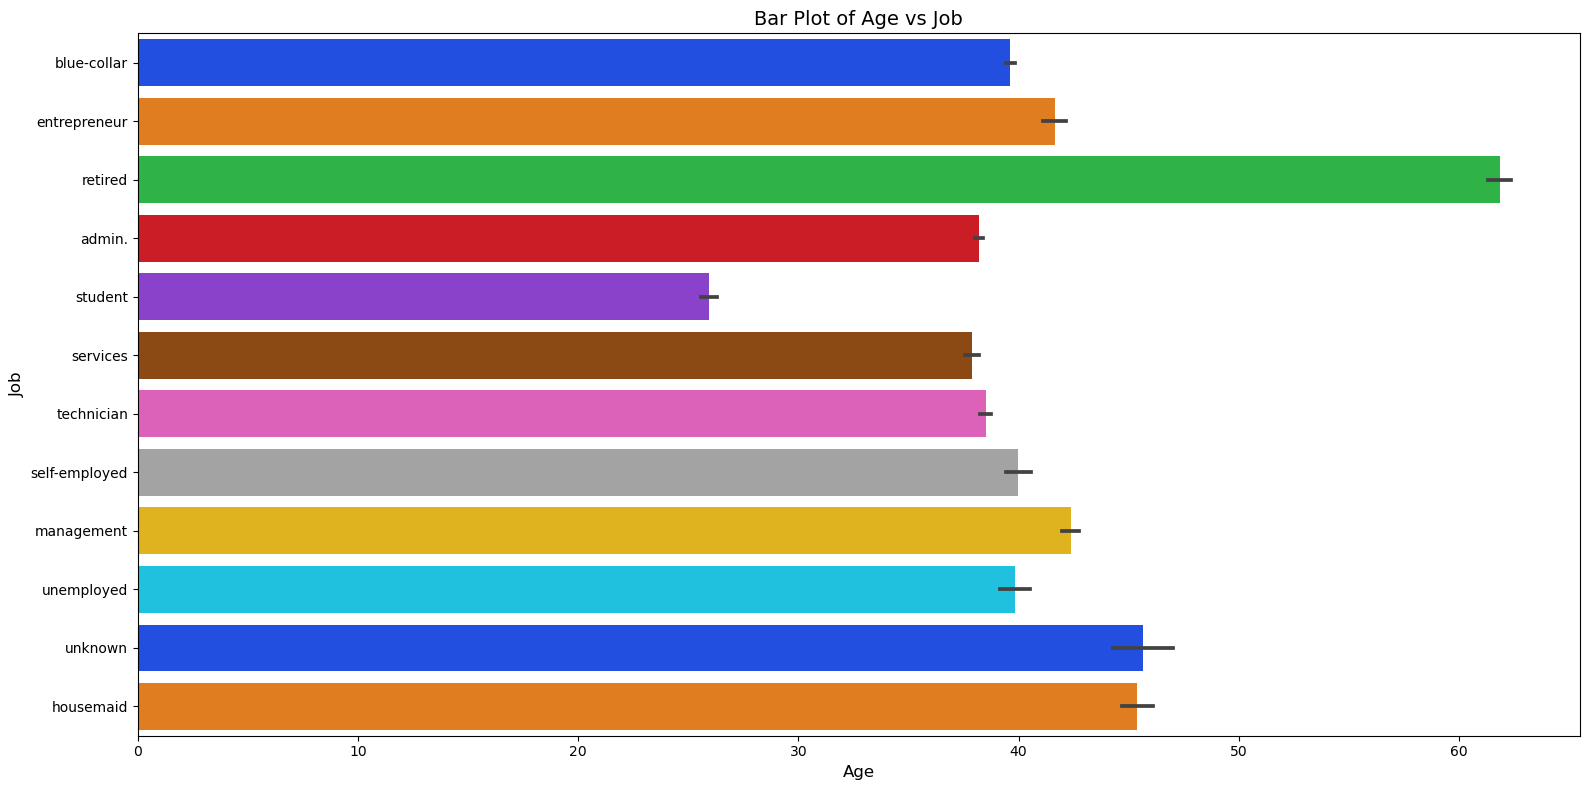

In [12]:
plt.figure(figsize=(16, 8))
sns.barplot(x="age", y="job", data=data, palette="bright")
plt.title("Bar Plot of Age vs Job", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Job", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_1724\1644591158.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[cols], kde=True,  bins=10, palette="bright")
C:\Users\Reksi Haloho\anaconda3\envs\tf-new\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_1724\1644591158.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[cols], kde=True,  bins=10, palette="bright")
C:\Users\Reksi Haloho\anaconda3\envs\tf-new\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


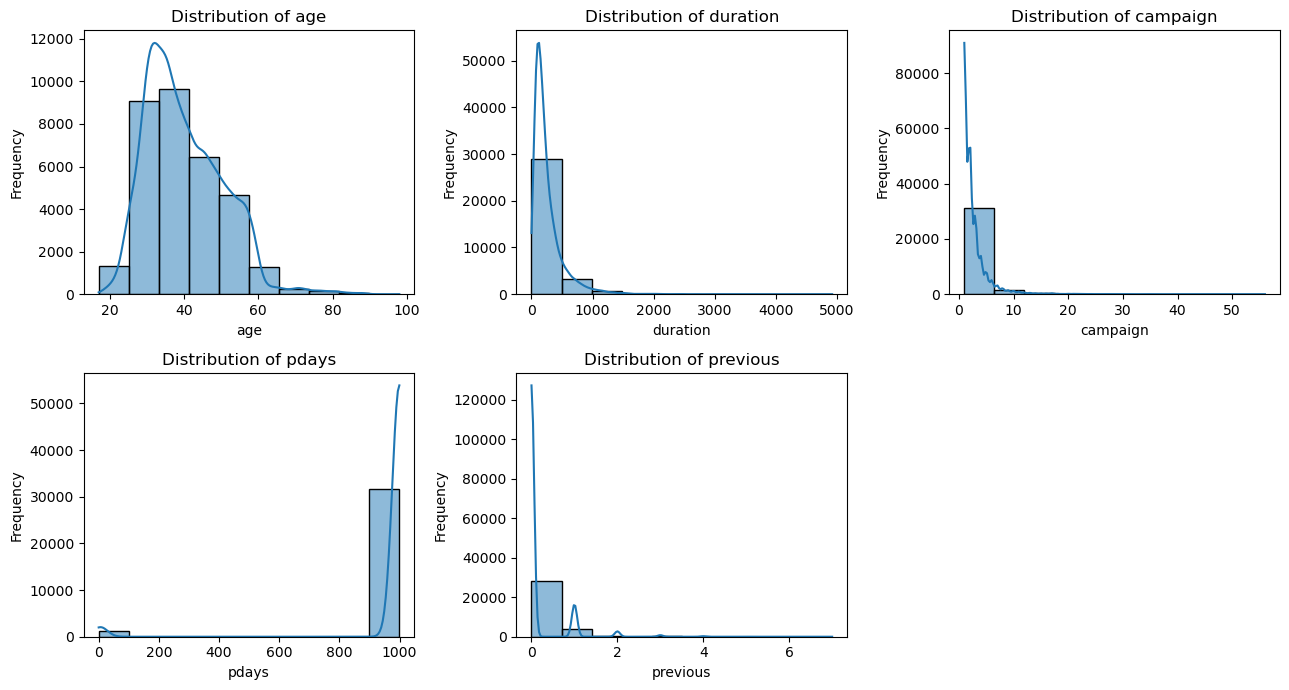

In [13]:
# 1D Visualization
select_datatpes=data.select_dtypes(include=["int64"] ).columns
plt.figure(figsize=(13, 7))

for i, cols in enumerate(select_datatpes):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[cols], kde=True,  bins=10, palette="bright")
    plt.title(f"Distribution of {cols}")
    plt.xlabel(cols)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


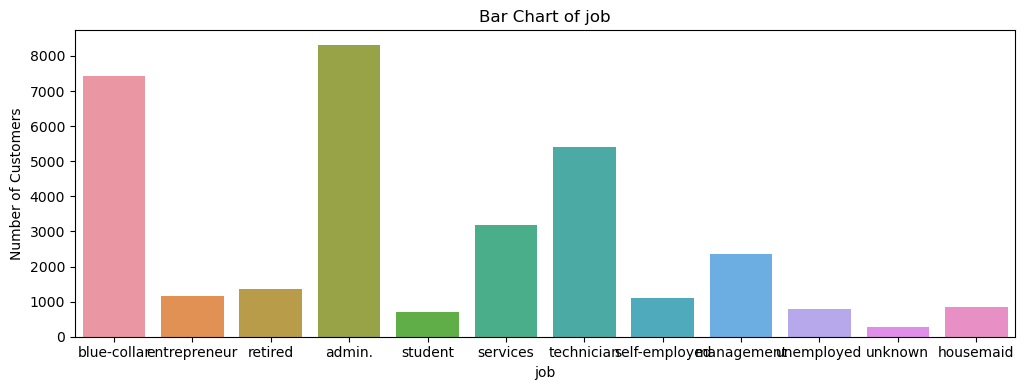

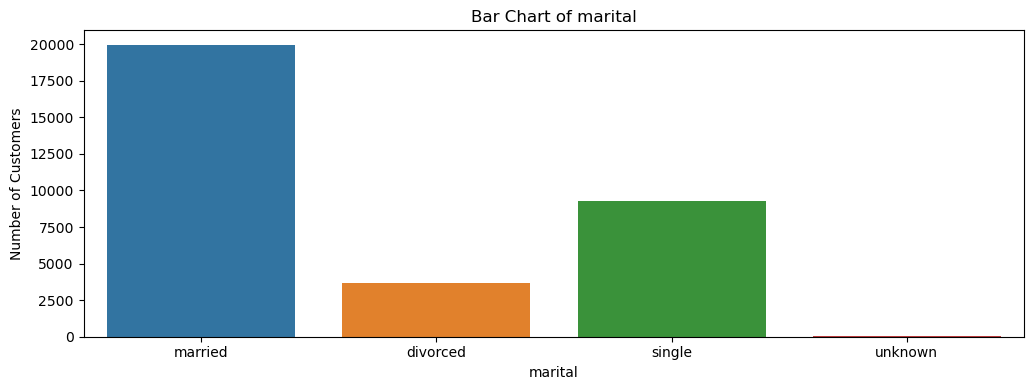

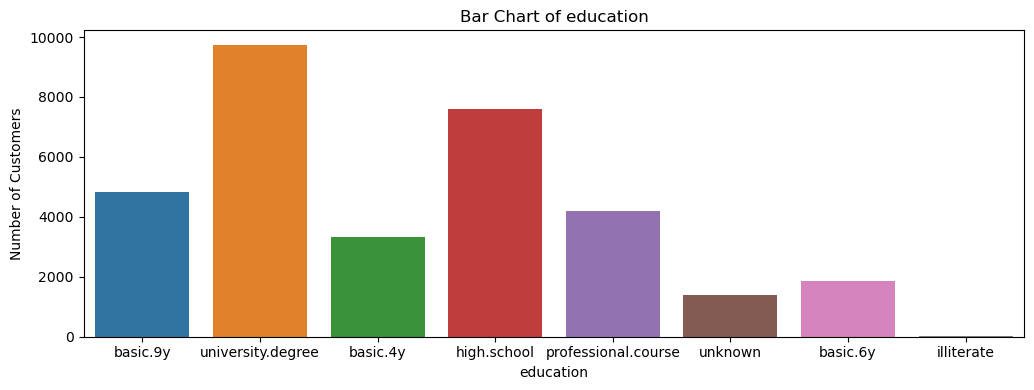

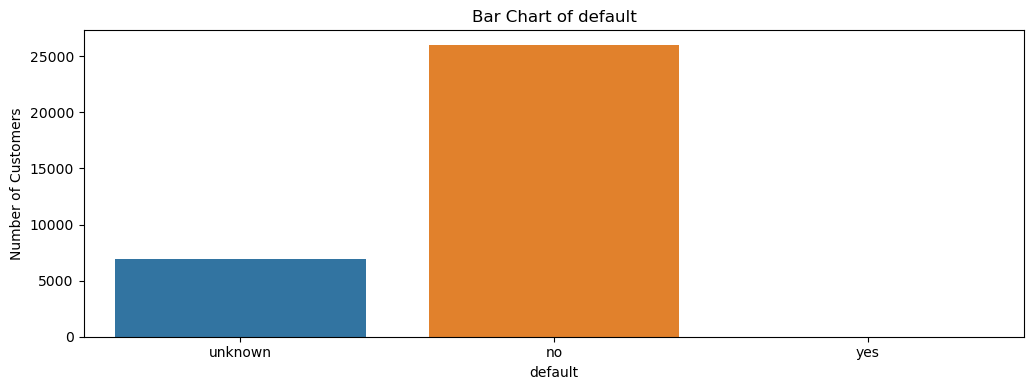

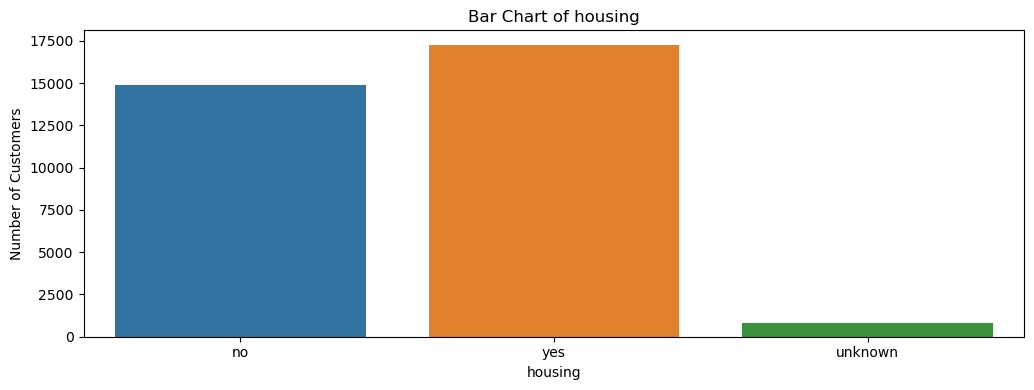

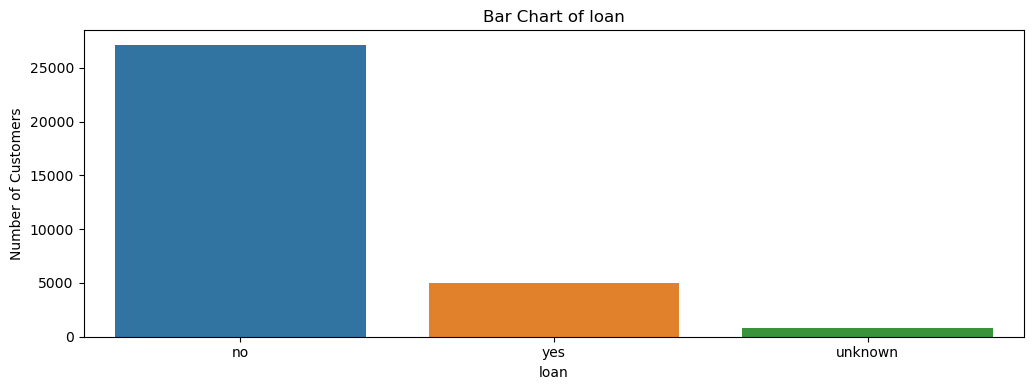

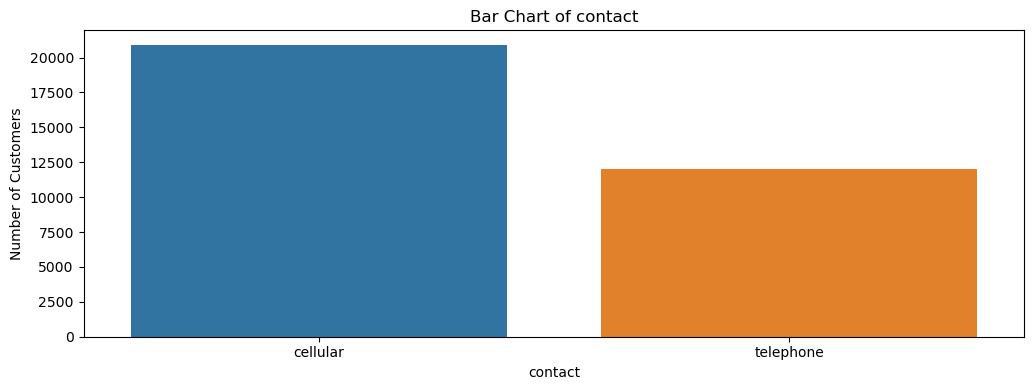

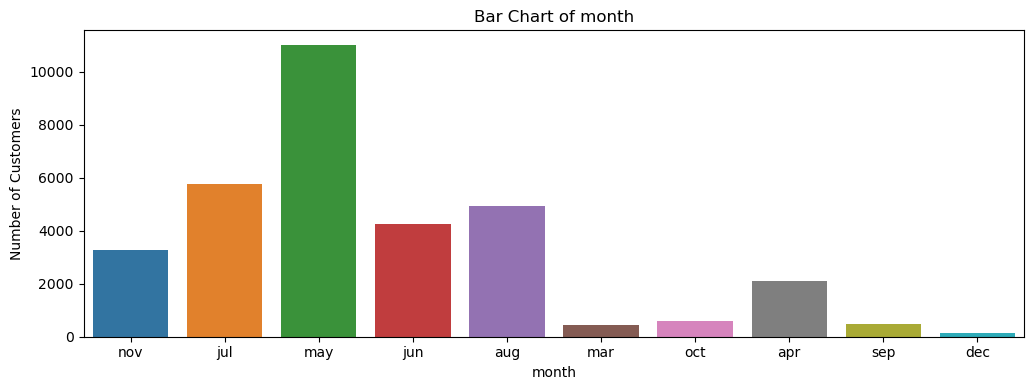

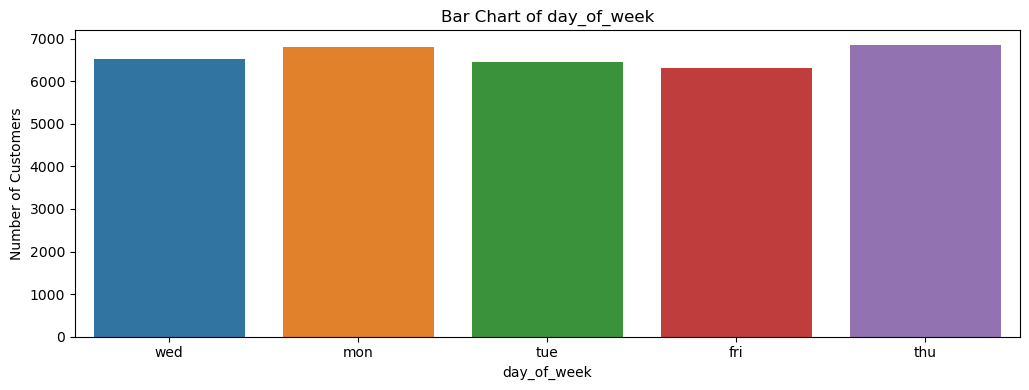

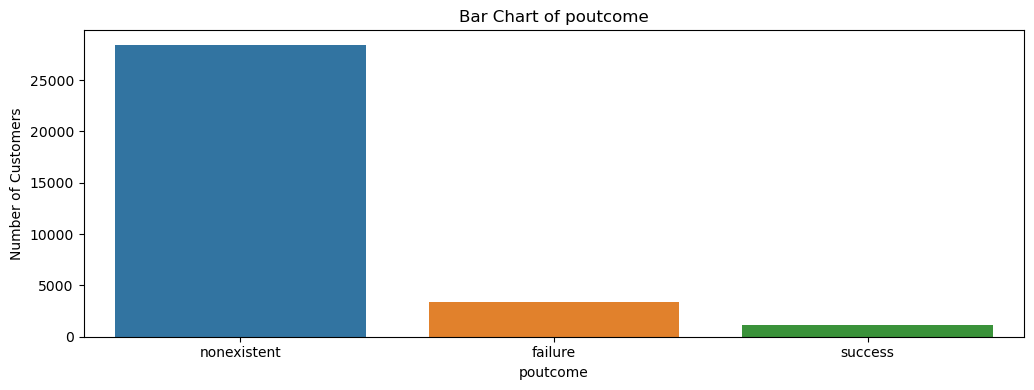

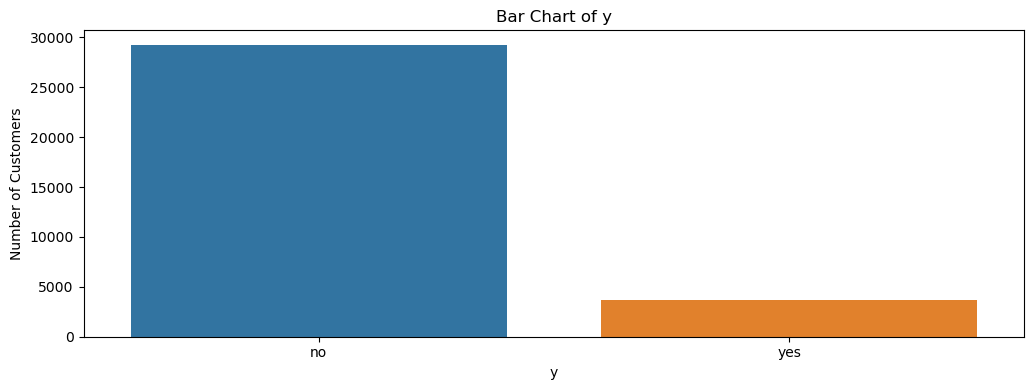

In [14]:
cat_var = data.select_dtypes(include=["object"]).columns

for i, column in enumerate(cat_var):
    plt.figure(figsize=(20, 4))
    
    # Bar Chart using Seaborn
    plt.subplot(1, 2, 1)
    sns.countplot(x=column, data=data)
    plt.xlabel(column)
    plt.ylabel("Number of Customers")
    plt.title(f"Bar Chart of {column}")
    
    plt.tight_layout()
    plt.show()

## Data Processing

#### Drop Duplicate

In [15]:
print ("Before drop duplicated data")
data.shape

Before drop duplicated data


(32950, 16)

In [16]:
data = data.drop_duplicates(keep='first')

In [17]:
print ("After drop duplicated data")
data.shape

After drop duplicated data


(32942, 16)

#### Missing Value Handling

In [18]:
# Checking Missing Value
data.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

Result : No Missing Value

#### Handling Outliers

In [19]:
data.describe()

,age,duration,campaign,pdays,previous
count,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000
mean,40.012810,258.159614,2.560804,962.043440,0.174762
std,10.403035,258.995259,2.752579,187.973035,0.499078
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


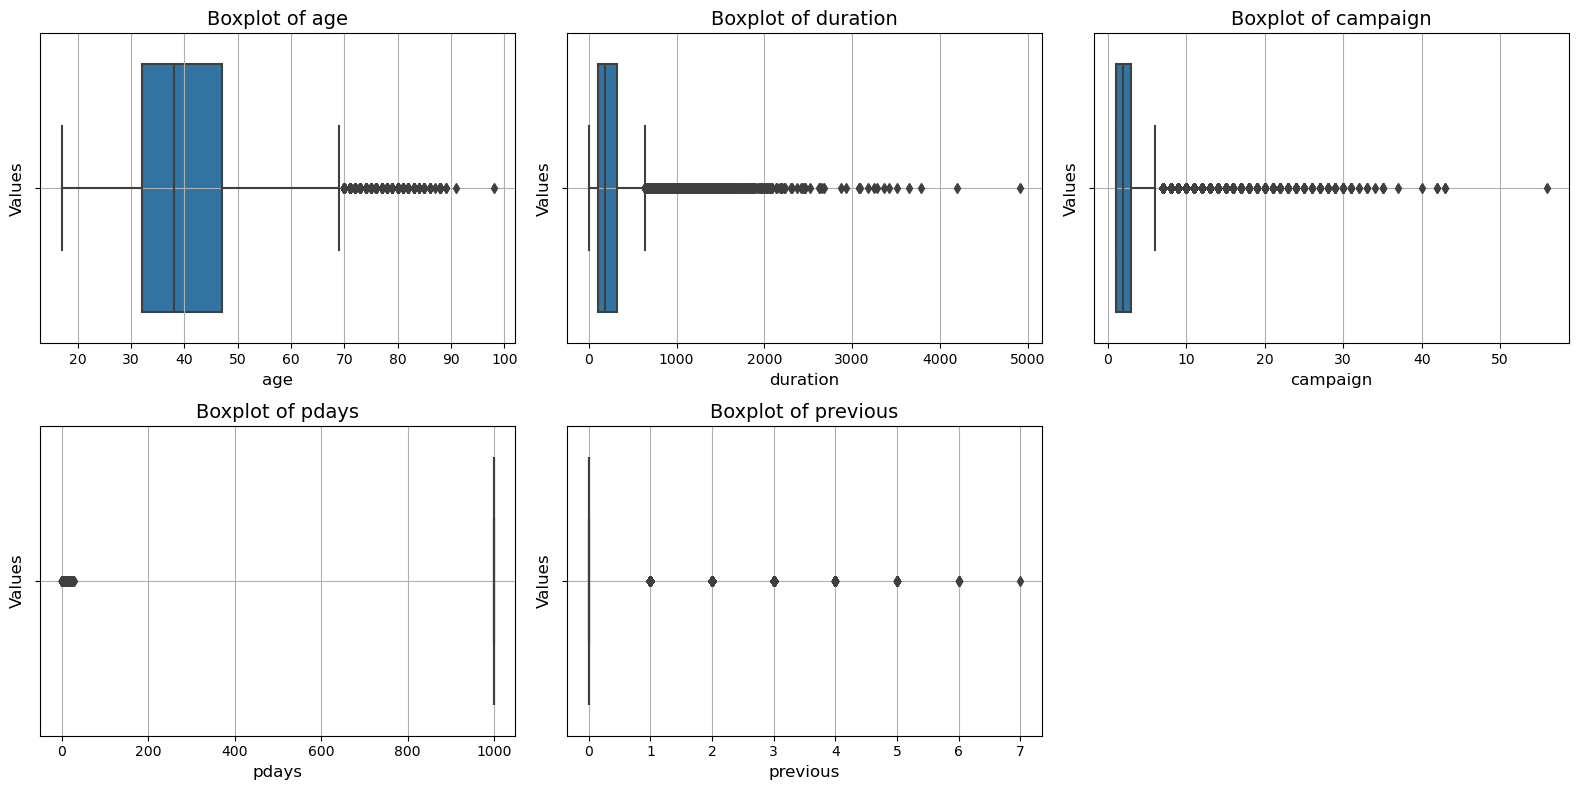

In [20]:
# Checking Outlier using boxplot
import matplotlib.pyplot as plt
import seaborn as sns 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axes = axes.flatten()
for i, col in enumerate(data_numeric):
    sns.boxplot(x=col, data=data_numeric, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Values", fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)
    axes[i].grid(True)

plt.tight_layout()
axes[-1].axis("off")
plt.show()

In [21]:
# Calculate the upper and lower limits
def total_outliers (data):
    data= sorted(data)
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
print ( 'Q1 =', Q1,
       'IQR =',  IQR, 
       'Q3 =', Q3)

Q1 = 32.0 IQR = 15.0 Q3 = 47.0


In [22]:
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)
print ("Lower Bound =", lower_bound)
print ("Upper Bound =", upper_bound)

Lower Bound = 9.5
Upper Bound = 69.5


In [23]:
# Create arrays of Boolean values indicating the outlier rows
lower_array = np.where(data['age'] < lower_bound)[0]
upper_array = np.where(data['age'] > upper_bound)[0]

In [24]:
# Removing the outliers
data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)

C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_1724\2164083994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(index=upper_array, inplace=True)
C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_1724\2164083994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(index=lower_array, inplace=True)


In [25]:
# Print the new shape of the DataFrame
print("New Shape: ", data.shape)

New Shape:  (32575, 16)


In [26]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [27]:
data.describe()

,age,duration,campaign,pdays,previous
count,32575.000000,32575.000000,32575.000000,32575.000000,32575.000000
mean,39.997360,258.026431,2.562394,962.175963,0.174244
std,10.365924,258.361232,2.757748,187.648259,0.498077
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


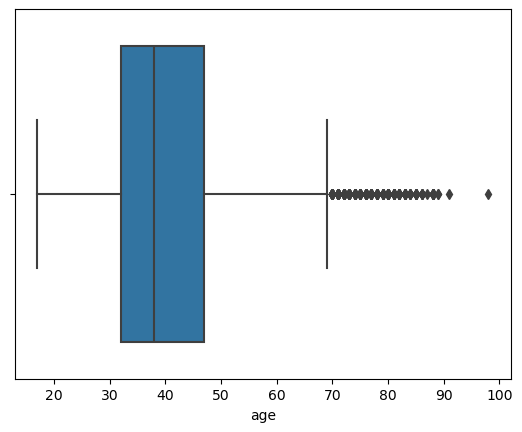

In [28]:
ax = sns.boxplot(x=data['age'])

#### Feature Scaling

In [29]:
#Standardized Charges Using Standarscaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [30]:
minmax_scaler.fit(data_numeric)
std_scaler.fit(data_numeric)

data_minmax= minmax_scaler.transform(data_numeric)
data_std= std_scaler.transform(data_numeric)

In [31]:
data_minmax = pd.DataFrame(data_minmax, columns=data_numeric.columns)
data_minmax.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,0.284125,0.052486,0.028375,0.963015,0.024960
std,0.128440,0.052659,0.050042,0.188139,0.071289
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.020943,0.000000,1.000000,0.000000
50%,0.259259,0.036600,0.018182,1.000000,0.000000
75%,0.370370,0.064864,0.036364,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


> Dapat dilihat pada dataframe, nilai Mean dan standar deviasi dari data yang telah di scaling dengan StandarScaler mendaki O dan 1 secara beturut-turut.

In [32]:
data_std = pd.DataFrame(data_std, columns=data_numeric.columns)
data_std.describe()

,age,duration,campaign,pdays,previous
count,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04
mean,2.510620e-16,-6.879003e-17,-5.692968e-17,-1.898734e-16,-2.266944e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-2.212156e+00,-9.967389e-01,-5.670225e-01,-5.118709e+00,-3.501269e-01
25%,-7.703301e-01,-5.990125e-01,-5.670225e-01,1.965838e-01,-3.501269e-01
50%,-1.935999e-01,-3.016831e-01,-2.036879e-01,1.965838e-01,-3.501269e-01
75%,6.714954e-01,2.350545e-01,1.596467e-01,1.965838e-01,-3.501269e-01
max,5.573702e+00,1.799373e+01,1.941638e+01,1.965838e-01,1.367745e+01


C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_1724\2687069578.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], ax=ax[0])
C:\Users\Reksi Haloho\anaconda3\envs\tf-new\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_1724\2687069578.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure

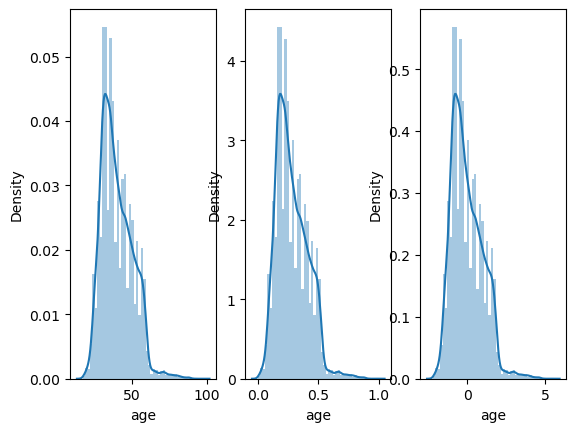

In [33]:
# Perbandingan Visualisasi variabel "Charges" sebelum dan sesudah di Scaling
fig, ax= plt.subplots(ncols=3)
sns.distplot(data['age'], ax=ax[0])
sns.distplot(data_minmax['age'], ax=ax[1])
sns.distplot(data_std['age'], ax=ax[2])
plt.show()

#### Imbalanced Data

In [34]:
data['y'].value_counts()

y
no     28925
yes     3650
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

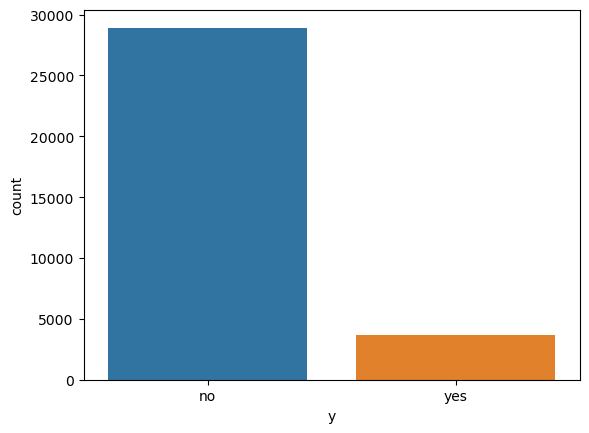

In [35]:
sns.countplot(x='y',data=data)

#### Encoding Categorial Data

In [36]:
for column in data.columns:
    print (f"=========={column}==========")
    display(data[column].value_counts())
    print()

==========age==========


age
31    1532
32    1455
33    1428
35    1404
36    1390
      ... 
17       3
89       2
87       1
91       1
98       1
Name: count, Length: 75, dtype: int64


==========job==========


job
admin.           8226
blue-collar      7370
technician       5339
services         3159
management       2320
retired          1328
entrepreneur     1141
self-employed    1095
housemaid         841
unemployed        793
student           704
unknown           259
Name: count, dtype: int64


==========marital==========


marital
married     19727
single       9147
divorced     3636
unknown        65
Name: count, dtype: int64


==========education==========


education
university.degree      9626
high.school            7508
basic.9y               4777
professional.course    4145
basic.4y               3282
basic.6y               1841
unknown                1380
illiterate               16
Name: count, dtype: int64


==========default==========


default
no         25696
unknown     6876
yes            3
Name: count, dtype: int64


==========housing==========


housing
yes        17051
no         14738
unknown      786
Name: count, dtype: int64


==========loan==========


loan
no         26829
yes         4960
unknown      786
Name: count, dtype: int64


==========contact==========


contact
cellular     20658
telephone    11917
Name: count, dtype: int64


==========month==========


month
may    10870
jul     5706
aug     4903
jun     4199
nov     3229
apr     2060
oct      581
sep      457
mar      429
dec      141
Name: count, dtype: int64


==========day_of_week==========


day_of_week
thu    6785
mon    6744
wed    6435
tue    6366
fri    6245
Name: count, dtype: int64


==========duration==========


duration
90      147
136     138
124     135
85      135
82      133
       ... 
1202      1
978       1
1804      1
1364      1
1434      1
Name: count, Length: 1463, dtype: int64


==========campaign==========


campaign
1     13953
2      8380
3      4250
4      2089
5      1238
6       761
7       492
8       327
9       220
10      186
11      141
12       91
13       71
17       51
14       50
15       45
16       42
18       26
20       22
21       20
19       16
22       13
24       12
23       12
27        9
25        8
26        7
31        7
29        7
28        6
30        6
35        4
33        3
43        2
32        2
42        2
34        1
37        1
40        1
56        1
Name: count, dtype: int64


==========pdays==========


pdays
999    31367
3        347
6        333
4         95
2         52
7         46
9         44
10        43
5         40
12        39
13        28
1         22
11        21
15        21
14        18
8         14
0         12
16         9
17         8
18         5
22         3
19         2
21         2
27         1
25         1
20         1
26         1
Name: count, dtype: int64


==========previous==========


previous
0    28102
1     3625
2      598
3      171
4       60
5       13
6        5
7        1
Name: count, dtype: int64


==========poutcome==========


poutcome
nonexistent    28102
failure         3385
success         1088
Name: count, dtype: int64


==========y==========


y
no     28925
yes     3650
Name: count, dtype: int64

#### Encoding Categorial Data

In [37]:
for column in data.columns:
    print (f"=========={column}==========")
    display(data[column].value_counts())
    
    print()

==========age==========


age
31    1532
32    1455
33    1428
35    1404
36    1390
      ... 
17       3
89       2
87       1
91       1
98       1
Name: count, Length: 75, dtype: int64


==========job==========


job
admin.           8226
blue-collar      7370
technician       5339
services         3159
management       2320
retired          1328
entrepreneur     1141
self-employed    1095
housemaid         841
unemployed        793
student           704
unknown           259
Name: count, dtype: int64


==========marital==========


marital
married     19727
single       9147
divorced     3636
unknown        65
Name: count, dtype: int64


==========education==========


education
university.degree      9626
high.school            7508
basic.9y               4777
professional.course    4145
basic.4y               3282
basic.6y               1841
unknown                1380
illiterate               16
Name: count, dtype: int64


==========default==========


default
no         25696
unknown     6876
yes            3
Name: count, dtype: int64


==========housing==========


housing
yes        17051
no         14738
unknown      786
Name: count, dtype: int64


==========loan==========


loan
no         26829
yes         4960
unknown      786
Name: count, dtype: int64


==========contact==========


contact
cellular     20658
telephone    11917
Name: count, dtype: int64


==========month==========


month
may    10870
jul     5706
aug     4903
jun     4199
nov     3229
apr     2060
oct      581
sep      457
mar      429
dec      141
Name: count, dtype: int64


==========day_of_week==========


day_of_week
thu    6785
mon    6744
wed    6435
tue    6366
fri    6245
Name: count, dtype: int64


==========duration==========


duration
90      147
136     138
124     135
85      135
82      133
       ... 
1202      1
978       1
1804      1
1364      1
1434      1
Name: count, Length: 1463, dtype: int64


==========campaign==========


campaign
1     13953
2      8380
3      4250
4      2089
5      1238
6       761
7       492
8       327
9       220
10      186
11      141
12       91
13       71
17       51
14       50
15       45
16       42
18       26
20       22
21       20
19       16
22       13
24       12
23       12
27        9
25        8
26        7
31        7
29        7
28        6
30        6
35        4
33        3
43        2
32        2
42        2
34        1
37        1
40        1
56        1
Name: count, dtype: int64


==========pdays==========


pdays
999    31367
3        347
6        333
4         95
2         52
7         46
9         44
10        43
5         40
12        39
13        28
1         22
11        21
15        21
14        18
8         14
0         12
16         9
17         8
18         5
22         3
19         2
21         2
27         1
25         1
20         1
26         1
Name: count, dtype: int64


==========previous==========


previous
0    28102
1     3625
2      598
3      171
4       60
5       13
6        5
7        1
Name: count, dtype: int64


==========poutcome==========


poutcome
nonexistent    28102
failure         3385
success         1088
Name: count, dtype: int64


==========y==========


y
no     28925
yes     3650
Name: count, dtype: int64

In [38]:
#Standarisasi Data Numerikal
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(data[['age','duration','campaign','pdays']])
data[['age','duration','campaign','pdays']] = std_scaler.transform(data[['age','duration','campaign','pdays']])
data

C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_1724\1311584985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['age','duration','campaign','pdays']] = std_scaler.transform(data[['age','duration','campaign','pdays']])


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0.868497,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,-0.120091,0.521305,0.196243,0,nonexistent,no
1,-0.289160,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,-0.216856,-0.203936,0.196243,1,failure,no
3,-0.385631,admin.,married,university.degree,no,yes,no,telephone,may,mon,-0.534246,-0.203936,0.196243,0,nonexistent,no
4,1.833212,retired,divorced,university.degree,no,no,no,cellular,jun,tue,0.425665,-0.203936,0.196243,0,nonexistent,no
5,-1.060931,admin.,single,university.degree,no,no,no,cellular,aug,wed,-0.007844,-0.203936,0.196243,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,-1.157402,services,single,high.school,no,yes,no,cellular,jul,tue,-0.255563,-0.566556,0.196243,0,nonexistent,no
32946,1.157912,technician,married,professional.course,no,yes,no,cellular,nov,fri,-0.751000,-0.566556,0.196243,1,failure,no
32947,1.350855,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,-0.491670,0.521305,0.196243,0,nonexistent,no
32948,-1.060931,admin.,married,university.degree,no,no,no,telephone,may,fri,-0.360069,-0.566556,0.196243,0,nonexistent,no


In [39]:
#OHE : Marital, Contact, deafult, housing, loan, poutcome
#Directionary Encoding : y
#Frequency Encoding : job, education, mounth, day_of_week, campaign

In [40]:
#OHE
col_ohe = ['marital','contact','poutcome','default','housing','loan']
df = pd.get_dummies(data, columns = col_ohe, dtype='int')

In [41]:
#Dictionary Encoding    
mapping_dictionary = {
    "y" :
        {
            "no":0,
            "yes":1
        }}
df.replace(mapping_dictionary, inplace = True)

C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_1724\2795872780.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapping_dictionary, inplace = True)


In [42]:
df

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,y,...,poutcome_success,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,0.868497,blue-collar,basic.9y,nov,wed,-0.120091,0.521305,0.196243,0,0,...,0,0,1,0,1,0,0,1,0,0
1,-0.289160,entrepreneur,university.degree,nov,wed,-0.216856,-0.203936,0.196243,1,0,...,0,1,0,0,1,0,0,1,0,0
3,-0.385631,admin.,university.degree,may,mon,-0.534246,-0.203936,0.196243,0,0,...,0,1,0,0,0,0,1,1,0,0
4,1.833212,retired,university.degree,jun,tue,0.425665,-0.203936,0.196243,0,0,...,0,1,0,0,1,0,0,1,0,0
5,-1.060931,admin.,university.degree,aug,wed,-0.007844,-0.203936,0.196243,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,-1.157402,services,high.school,jul,tue,-0.255563,-0.566556,0.196243,0,0,...,0,1,0,0,0,0,1,1,0,0
32946,1.157912,technician,professional.course,nov,fri,-0.751000,-0.566556,0.196243,1,0,...,0,1,0,0,0,0,1,1,0,0
32947,1.350855,admin.,basic.9y,jul,mon,-0.491670,0.521305,0.196243,0,0,...,0,1,0,0,1,0,0,0,0,1
32948,-1.060931,admin.,university.degree,may,fri,-0.360069,-0.566556,0.196243,0,0,...,0,1,0,0,1,0,0,1,0,0


In [43]:
# Frequency Encoding
## Job
freq_j = df['job'].value_counts().reset_index()
freq_j

,job,count
0,admin.,8226
1,blue-collar,7370
2,technician,5339
3,services,3159
4,management,2320
5,retired,1328
6,entrepreneur,1141
7,self-employed,1095
8,housemaid,841
9,unemployed,793


In [44]:
freq_j['percent_job'] = round((freq_j['count']/freq_j['count'].sum())*100,2)
freq_j

,job,count,percent_job
0,admin.,8226,25.25
1,blue-collar,7370,22.62
2,technician,5339,16.39
3,services,3159,9.70
4,management,2320,7.12
5,retired,1328,4.08
6,entrepreneur,1141,3.50
7,self-employed,1095,3.36
8,housemaid,841,2.58
9,unemployed,793,2.43


In [45]:
df = df.merge(freq_j[['job','percent_job']], on='job', how='inner')

In [46]:
df [['job','percent_job']]       

,job,percent_job
0,blue-collar,22.62
1,entrepreneur,3.50
2,admin.,25.25
3,retired,4.08
4,admin.,25.25
...,...,...
32570,services,9.70
32571,technician,16.39
32572,admin.,25.25
32573,admin.,25.25


In [47]:
## Education
freq_ed = df['education'].value_counts().reset_index()
freq_ed['percent_education'] = round((freq_ed['count']/freq_ed['count'].sum())*100,2)
freq_ed

,education,count,percent_education
0,university.degree,9626,29.55
1,high.school,7508,23.05
2,basic.9y,4777,14.66
3,professional.course,4145,12.72
4,basic.4y,3282,10.08
5,basic.6y,1841,5.65
6,unknown,1380,4.24
7,illiterate,16,0.05


In [48]:
df = df.merge(freq_ed[['education','percent_education']], on='education', how='inner')
df [['education','percent_education']] 

,education,percent_education
0,basic.9y,14.66
1,university.degree,29.55
2,university.degree,29.55
3,university.degree,29.55
4,university.degree,29.55
...,...,...
32570,high.school,23.05
32571,professional.course,12.72
32572,basic.9y,14.66
32573,university.degree,29.55


In [49]:
## Month
freq_m = df['month'].value_counts().reset_index()
freq_m['percent_month'] = round((freq_m['count']/freq_ed['count'].sum())*100,2)
freq_m

,month,count,percent_month
0,may,10870,33.37
1,jul,5706,17.52
2,aug,4903,15.05
3,jun,4199,12.89
4,nov,3229,9.91
5,apr,2060,6.32
6,oct,581,1.78
7,sep,457,1.40
8,mar,429,1.32
9,dec,141,0.43


In [50]:
df = df.merge(freq_m[['month','percent_month']], on='month', how='inner')
df [['month','percent_month']] 

,month,percent_month
0,nov,9.91
1,nov,9.91
2,may,33.37
3,jun,12.89
4,aug,15.05
...,...,...
32570,jul,17.52
32571,nov,9.91
32572,jul,17.52
32573,may,33.37


In [51]:
## Day Of Week
freq_Dow = df['day_of_week'].value_counts().reset_index()
freq_Dow['Percent_Day_of_week'] = round((freq_Dow['count']/freq_Dow['count'].sum())*100,2)
freq_Dow

,day_of_week,count,Percent_Day_of_week
0,thu,6785,20.83
1,mon,6744,20.70
2,wed,6435,19.75
3,tue,6366,19.54
4,fri,6245,19.17


In [52]:
df = df.merge(freq_Dow[['day_of_week','Percent_Day_of_week']], on='day_of_week', how='inner')
df [['day_of_week','Percent_Day_of_week']] 

,day_of_week,Percent_Day_of_week
0,wed,19.75
1,wed,19.75
2,mon,20.70
3,tue,19.54
4,wed,19.75
...,...,...
32570,tue,19.54
32571,fri,19.17
32572,mon,20.70
32573,fri,19.17


In [53]:
df = df.drop(['job','education','month','day_of_week'],axis=1)

In [54]:
df.head()

,age,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,marital_unknown,...,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,percent_job,percent_education,percent_month,Percent_Day_of_week
0,0.868497,-0.120091,0.521305,0.196243,0,0,0,1,0,0,...,1,0,0,1,0,0,22.62,14.66,9.91,19.75
1,-0.289160,-0.216856,-0.203936,0.196243,1,0,0,1,0,0,...,1,0,0,1,0,0,3.50,29.55,9.91,19.75
2,-0.385631,-0.534246,-0.203936,0.196243,0,0,0,1,0,0,...,0,0,1,1,0,0,25.25,29.55,33.37,20.70
3,1.833212,0.425665,-0.203936,0.196243,0,0,1,0,0,0,...,1,0,0,1,0,0,4.08,29.55,12.89,19.54
4,-1.060931,-0.007844,-0.203936,0.196243,0,0,0,0,1,0,...,1,0,0,1,0,0,25.25,29.55,15.05,19.75


# Machine Learning Model

#### Data Splitting

In [55]:
#assign Target to y
y = df['y'].values
#assign all columns except "charges" to x
X = df.drop(['y'], axis=1).values

In [56]:
print ("y Shape:", y.shape)
print ("X Shape:", X.shape)

y Shape: (32575,)
X Shape: (32575, 27)


In [57]:
from imblearn.under_sampling import RandomUnderSampler

#UnderSampling
under_sampling = RandomUnderSampler(random_state=50)
X_under, y_under = under_sampling.fit_resample(X,y)

#OverSampling
#over_sampling = RandomOverSampler()
#X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X,y)

#Oversampling with smote
#X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X,y)

In [58]:
# Splitting Data Into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, train_size=0.7, random_state=50)

In [59]:
print("X_train dataset:", X_train.shape)
print("y_train dataset:",y_train.shape)
print("X_test dataset:",X_test.shape)
print("y_test dataset:",y_test.shape)

X_train dataset: (5110, 27)
y_train dataset: (5110,)
X_test dataset: (2190, 27)
y_test dataset: (2190,)


#### 1. KNN

In [60]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
predicted_y = knn.predict(X_test)
print ("KNN Accuracy according to K=3 is :",knn.score(X_test, y_test))

KNN Accuracy according to K=3 is : 0.7936073059360731


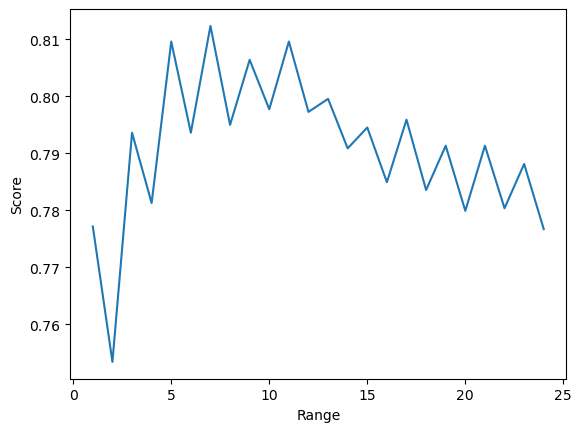

In [61]:
score_array = []
for each in range (1,25) :
    knn_loop = KNeighborsClassifier(n_neighbors = each)
    knn_loop.fit(X_train, y_train)
    score_array.append(knn_loop.score(X_test, y_test))

plt.plot(range(1,25),score_array)
plt.xlabel('Range')
plt.ylabel('Score')
plt.show()

In [62]:
knn_model= KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(X_train, y_train)
prediction_y = knn_model.predict(X_test)
accuracy_knn= knn_model.score(X_test, y_test)
print ("KNN Accuracy according K=7 is :", accuracy_knn)

KNN Accuracy according K=7 is : 0.8123287671232877


#### 2. Logistic Regression

In [63]:
# Logistic Regression Classification
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
accuracy_lr= lr_model.score(X_test, y_test)
print ("Logistic Regression Accuracy is :",accuracy_lr)

Logistic Regression Accuracy is : 0.8200913242009132


C:\Users\Reksi Haloho\anaconda3\envs\tf-new\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 3. Decission Tree Classification

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test) #Prediksi
accuracy_dt= dt_model.score(X_test, y_test)
print ("Decission Tree Accuracy is :",accuracy_dt)

Decission Tree Accuracy is : 0.7922374429223744


#### 4. Random Forest

In [65]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 10)
rf_model_initial.fit(X_train, y_train)
print ("Random Forest Accuracy is :",rf_model_initial.score(X_test, y_test))

Random Forest Accuracy is : 0.8191780821917808


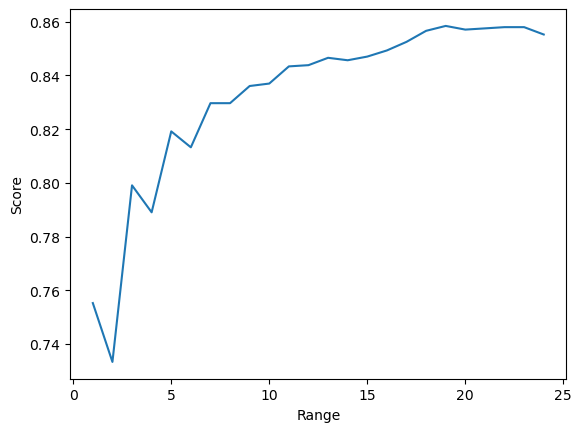

In [66]:
score_array = []
for each in range (1,25) :
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 10)
    rf_loop.fit(X_train, y_train)
    score_array.append(rf_loop.score(X_test, y_test))

plt.plot(range(1,25),score_array)
plt.xlabel('Range')
plt.ylabel('Score')
plt.show()

In [67]:
rf_model= RandomForestClassifier(n_estimators = 23, random_state = 1)
rf_model.fit(X_train, y_train)
accuracy_rf= rf_model.score(X_test, y_test)
print ("Random Forest Accuracy for 23 trees is :", accuracy_rf)

Random Forest Accuracy for 23 trees is : 0.854337899543379


#### 5. Naive Bayes

In [68]:
# Naives Bayes Classification
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
accuracy_nb= nb_model.score(X_test, y_test)
print ("Naives Bayes Accuracy is :",accuracy_nb)

Naives Bayes Accuracy is : 0.7410958904109589


# Model Evaluation

In [69]:
def model_evaluation (model, name):
    f, ax = plt.subplots(figsize=(8,5))
    confusion_matrix = pd.crosstab(y_test, model, rownames = ['Actual'], colnames =['Predicted'], margins = True)
    sns.heatmap (confusion_matrix, square = True, annot = True, fmt='d', ax=ax, cbar=True)
    plt.xlabel('Prediction Label')
    plt.ylabel('Actual Label');
    plt.title (name)
    print (confusion_matrix)
    plt.yticks([1.5,0.5], ['YES','NO'], va='center')
    plt.xticks([1.5,0.5], ['YES','NO'], va='center')
    plt.show()

In [70]:
# the Function that prints all scores
def print_scores (headline, y_true, y_pred):
    print (headline)
    acc_score = accuracy_score (y_true, y_pred)
    print ('Accuracy:', acc_score)
    pre_score = precision_score (y_true, y_pred)
    print ('Precision:', pre_score)
    rec_score = recall_score (y_true, y_pred)
    print ('Recall:', rec_score)
    f_score = f1_score (y_true, y_pred)
    print ('F1_Score:', f_score)

In [71]:
print_scores('==========KNN==========;', y_test, knn.predict(X_test))
print('====================')
print_scores('==========Logistic Regression==========;', y_test, lr_model.predict(X_test))
print('====================')
print_scores('==========Decision Tree==========;', y_test, dt_model.predict(X_test))
print('====================')
print_scores('==========Random Forest==========;', y_test, rf_model.predict(X_test))
print('====================')
print_scores('==========Naive Bayes==========;', y_test, nb_model.predict(X_test))
print('====================')

==========KNN==========;
Accuracy: 0.7936073059360731
Precision: 0.8129699248120301
Recall: 0.7737030411449016
F1_Score: 0.7928505957836847
==========Logistic Regression==========;
Accuracy: 0.8200913242009132
Precision: 0.8308957952468007
Recall: 0.8130590339892666
F1_Score: 0.8218806509945751
==========Decision Tree==========;
Accuracy: 0.7922374429223744
Precision: 0.7946666666666666
Recall: 0.7996422182468694
F1_Score: 0.797146678555506
==========Random Forest==========;
Accuracy: 0.854337899543379
Precision: 0.83375104427736
Recall: 0.8926654740608229
F1_Score: 0.8622030237580993
==========Naive Bayes==========;
Accuracy: 0.7410958904109589
Precision: 0.7095057034220532
Recall: 0.8345259391771019
F1_Score: 0.7669543773119606


Model Evaluasi Terbaik: Random Forest

Predicted     0     1   All
Actual                     
0           887   185  1072
1           209   909  1118
All        1096  1094  2190


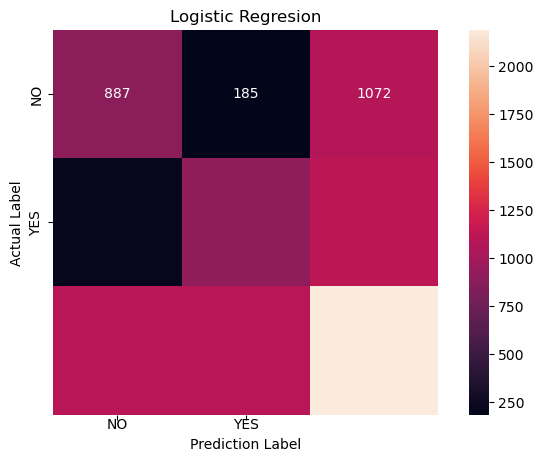

In [72]:
lr_y_pred = lr_model.predict(X_test)
model_evaluation(lr_y_pred,"Logistic Regresion")

Predicted    0     1   All
Actual                    
0          690   382  1072
1          185   933  1118
All        875  1315  2190


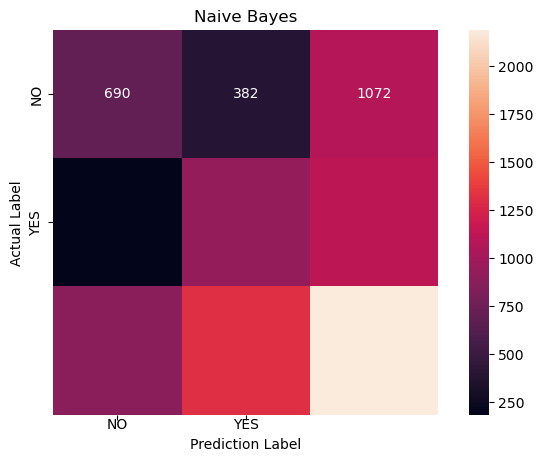

In [73]:
model_evaluation(nb_model.predict(X_test),"Naive Bayes")

Predicted     0     1   All
Actual                     
0           841   231  1072
1           224   894  1118
All        1065  1125  2190


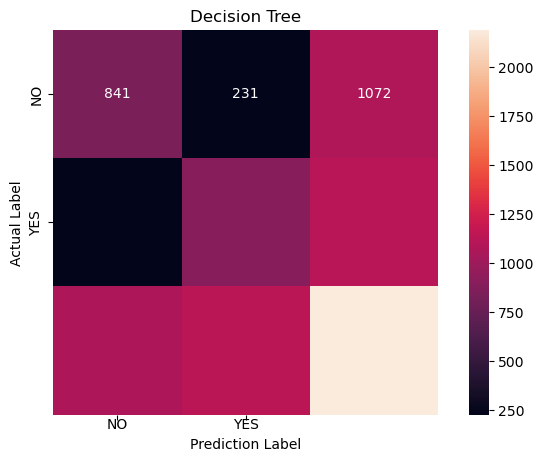

In [74]:
model_evaluation(dt_model.predict(X_test),"Decision Tree")

Predicted    0     1   All
Actual                    
0          873   199  1072
1          120   998  1118
All        993  1197  2190


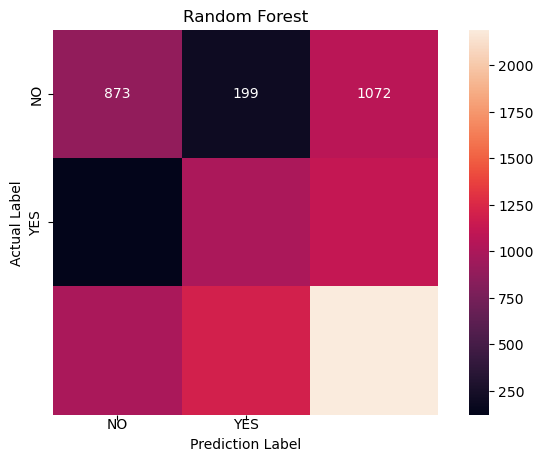

In [75]:
model_evaluation(rf_model.predict(X_test),"Random Forest")

Predicted     0     1   All
Actual                     
0           873   199  1072
1           253   865  1118
All        1126  1064  2190


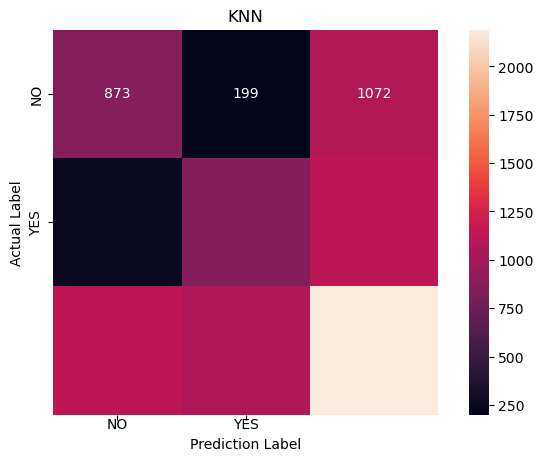

In [76]:
knn_model = knn.predict(X_test)
model_evaluation(knn_model,"KNN")

# Hypermeter Tuning

In [77]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 
from sklearn.metrics import classification_report

In [78]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [79]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=150)


In [80]:
model_grid = RandomForestClassifier(max_depth=9, 
                                    max_leaf_nodes=9, 
                                    n_estimators=150) 
model_grid.fit(X_train, y_train) 
y_pred_grid = rf_model.predict(X_test) 
print(classification_report(y_pred_grid, y_test)) 

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       993
           1       0.89      0.83      0.86      1197

    accuracy                           0.85      2190
   macro avg       0.85      0.86      0.85      2190
weighted avg       0.86      0.85      0.85      2190



C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_1724\2364651479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Reksi Haloho\anaconda3\envs\tf-new\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_1724\2364651479.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt y

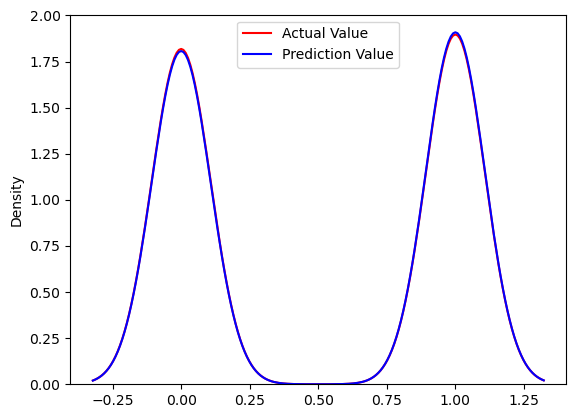

In [82]:
ax=sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", ax=ax, label="Prediction Value")
plt.legend(loc="best")
plt.show()